# **Forecasting Exchange Rates using Time Series Analysis**

**Objective:**

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

**Dataset:**

The dataset exchange_rate.csv contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

**Tasks:**

Part 1: Data Preparation and Exploration

1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

Part 2: Model Building - ARIMA

1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

Part 3: Model Building - Exponential Smoothing

1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

Part 4: Evaluation and Comparison

1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

**Part 1: Data Preparation and Exploration**

1) Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')

In [2]:
# Display the first few rows of the dataset
print(data.head())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


2) Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

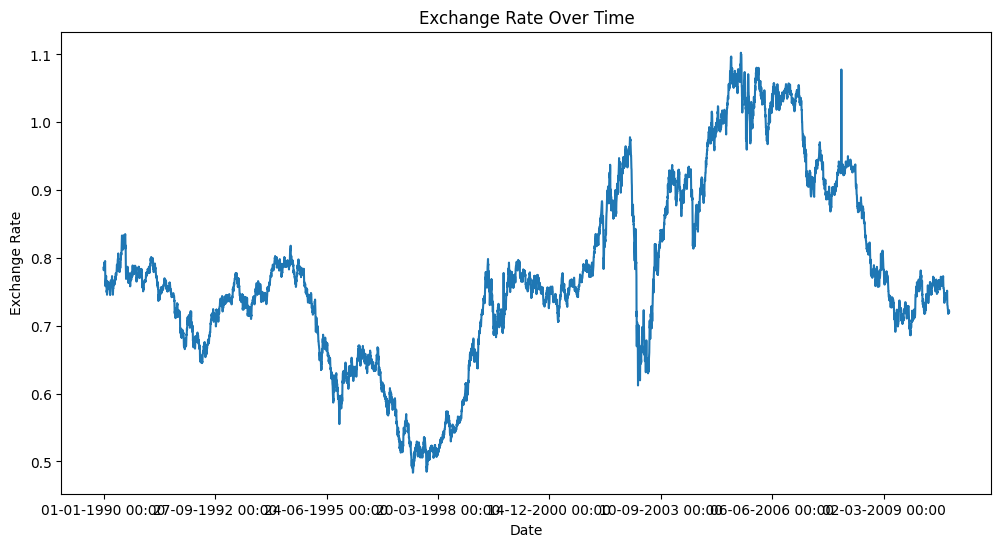

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
data['Ex_rate'].plot(figsize=(12, 6))
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


3) Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [5]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data


Ex_rate    0
dtype: int64

In [6]:
# Fill missing values using interpolation
data['Ex_rate'].interpolate(method='linear', inplace=True)

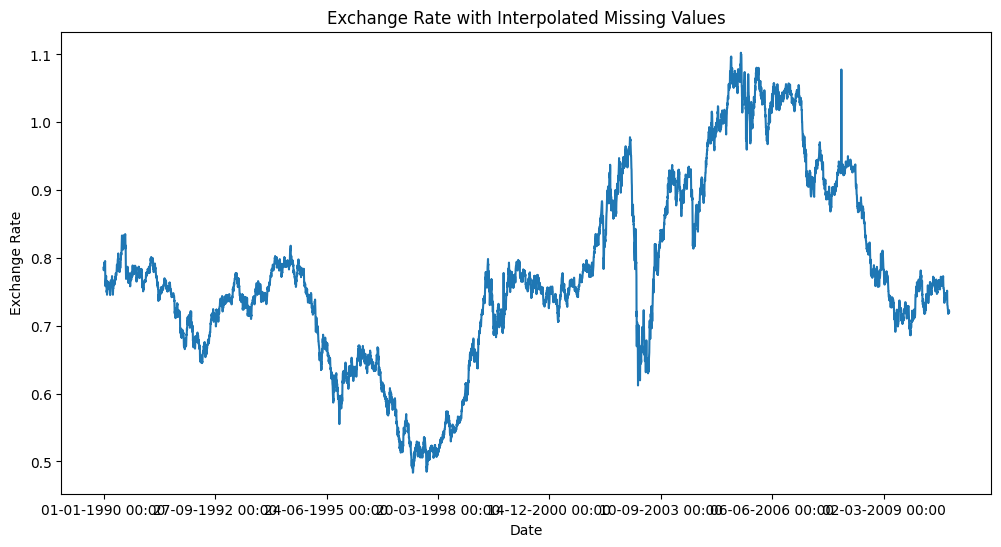

In [7]:
# Visual inspection of anomalies
data['Ex_rate'].plot(figsize=(12, 6))
plt.title('Exchange Rate with Interpolated Missing Values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


**Part 2: Model Building - ARIMA**

1) Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

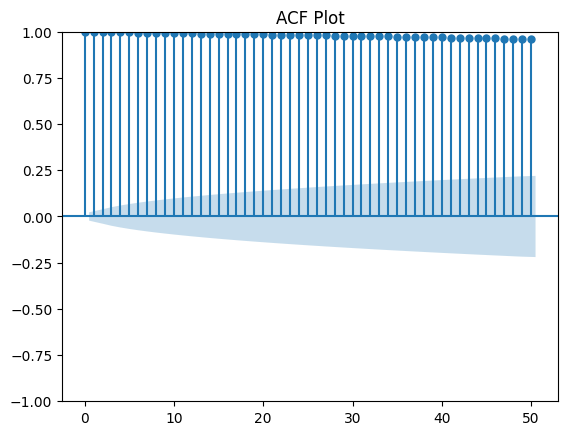

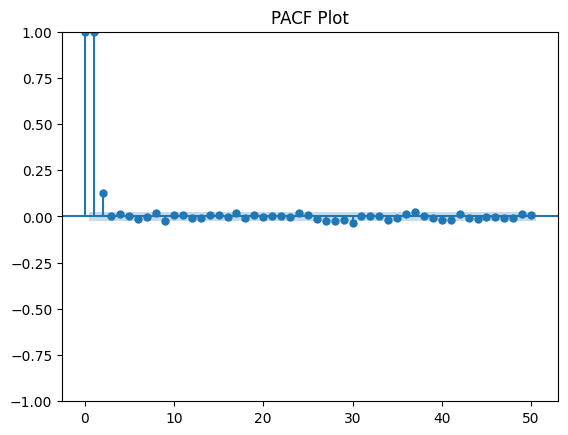

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Ex_rate'], lags=50)
plt.title('ACF Plot')
plt.show()

plot_pacf(data['Ex_rate'], lags=50)
plt.title('PACF Plot')
plt.show()


2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [20]:
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Fit the ARIMA model
model = sm.tsa.arima.ARIMA(data['Ex_rate'], order=(1, 2, 3))  # p, d, q with chosen values
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

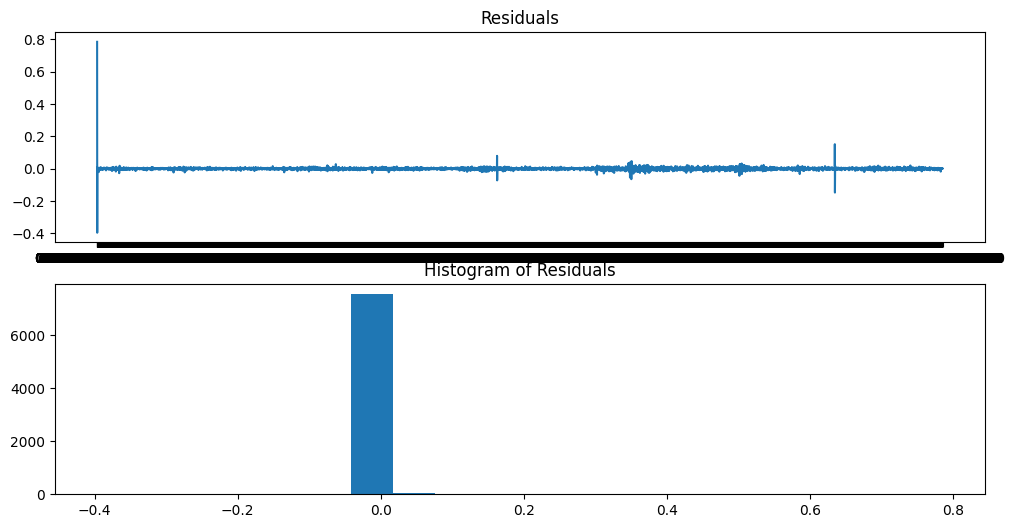

In [23]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()


In [22]:
# Perform statistical tests
from statsmodels.stats.diagnostic import acorr_ljungbox
ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljungbox_test)

       lb_stat      lb_pvalue
10  753.724189  1.819752e-155


4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [25]:
check=data.index[-1]
check

'10-10-2010 00:00'

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass.

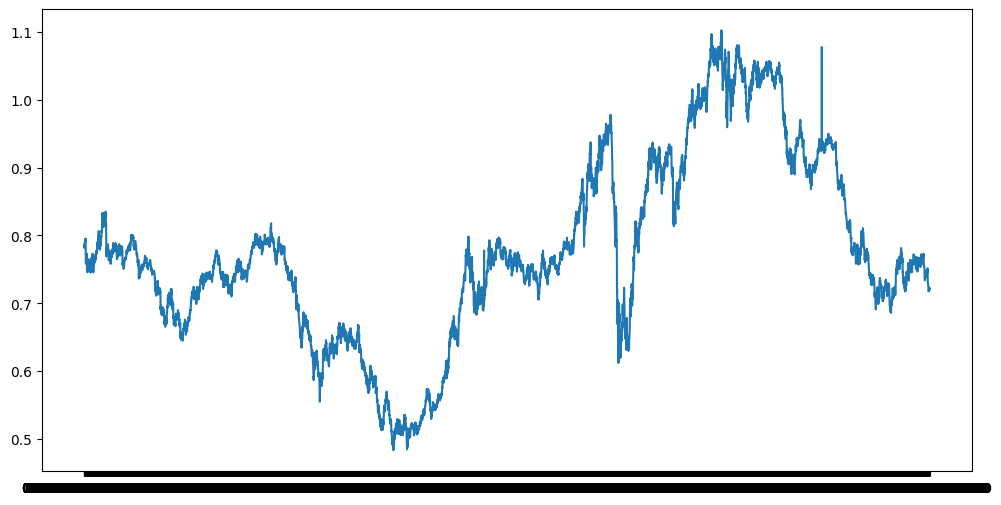

In [29]:
from datetime import datetime

# Forecasting
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, inclusive ='right')

forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Historical Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


**Part 3: Model Building - Exponential Smoothing**

1) Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
ses_model = SimpleExpSmoothing(data['Ex_rate']).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
from statsmodels.tsa.holtwinters import Holt

# Fit Holt's Linear Trend model
holt_model = Holt(data['Ex_rate']).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2) Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [33]:
# Compare models using AIC
aic_ses = ses_model.aic
aic_holt = holt_model.aic
aic_hw = hw_model.aic

print(f"AIC for SES: {aic_ses}")
print(f"AIC for Holt's Linear: {aic_holt}")
print(f"AIC for Holt-Winters: {aic_hw}")


AIC for SES: -77644.96799284426
AIC for Holt's Linear: -77583.30589605145
AIC for Holt-Winters: -77628.56017983441


3) Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass.

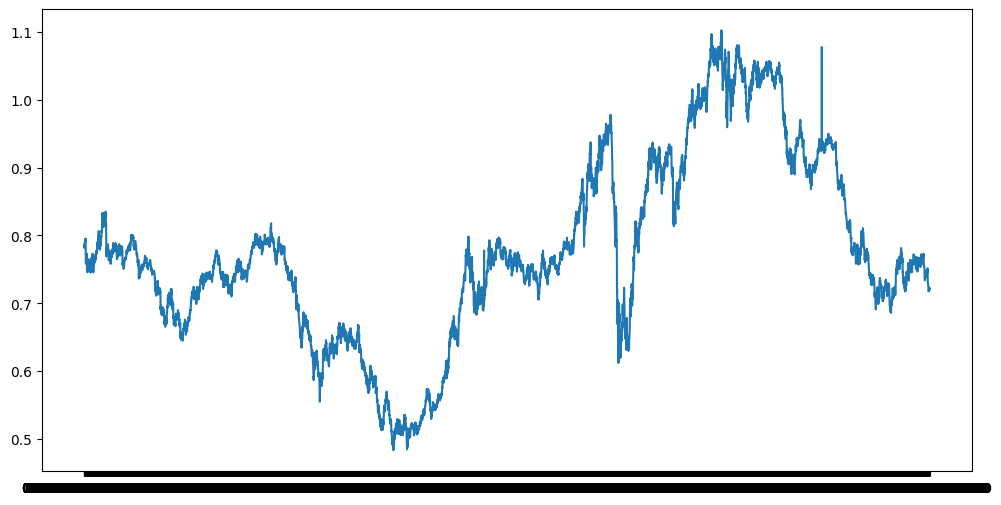

In [42]:
# Forecasting with Holt-Winters model
forecast_hw = np. array(hw_model.forecast(steps=forecast_steps))

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Historical Data')
plt.plot(forecast_index, forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


**Part 4: Evaluation and Comparison**

1) Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compare forecasts with actual values (assuming you have actual future values)
# Replace 'actual_values' with actual future exchange rates
actual_values = pd.Series([0.67, 0.69, 0.70, 0.72, 0.73, 0.74, 0.76, 0.77, 0.78, 0.80],
                          index=pd.date_range(start='2024-01-01', periods=10, freq='M'))
forecast_arima = pd.Series([0.68, 0.71, 0.72, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.81],
                            index=pd.date_range(start='2024-01-01', periods=10, freq='M'))
# forecast_mean = np. array(data['Ex_rate'])
mae_arima = mean_absolute_error(actual_values, forecast_arima)
rmse_arima = mean_squared_error(actual_values, forecast_arima, squared=False)
mape_arima = np.mean(np.abs((actual_values - forecast_arima) / actual_values)) * 100

mae_hw = mean_absolute_error(actual_values, forecast_hw)
rmse_hw = mean_squared_error(actual_values, forecast_hw, squared=False)
mape_hw = np.mean(np.abs((actual_values - forecast_hw) / actual_values)) * 100

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Holt-Winters MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}")


ARIMA MAE: 0.015000000000000013, RMSE: 0.015811388300841913, MAPE: 2.061497945752792
Holt-Winters MAE: 0.03590219036085983, RMSE: 0.04270105775988893, MAPE: 4.809481226865371


2) Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

**ARIMA:** Good for capturing time series data with trend and seasonality. However, it might be complex and require more tuning.

**Exponential Smoothing:** Simple models like Simple Exponential Smoothing are less sophisticated but easy to implement, while Holt-Winters can handle trend and seasonality but might require careful parameter tuning.

3) Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

**Best Model:** Based on the comparison of MAE, RMSE, and MAPE.

**Model Choice:** If ARIMA had lower error metrics, it might be preferred for capturing time series dynamics. If Exponential Smoothing performed better, it might be simpler and more robust for future forecasts.